In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\\Users\\Salih\\Desktop\\real_drug_dataset.csv")

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               1000 non-null   object 
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Condition                1000 non-null   object 
 4   Drug_Name                1000 non-null   object 
 5   Dosage_mg                1000 non-null   int64  
 6   Treatment_Duration_days  1000 non-null   int64  
 7   Side_Effects             1000 non-null   object 
 8   Improvement_Score        1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


**Açıklama (Hazırlık):**  
Bu hücrede öncelikle veri analizi için ihtiyaç duyduğum temel Python kütüphanelerini (`pandas`, `numpy`, `matplotlib`, `seaborn`) içe aktarıyorum. Daha sonra hocanın ödevde belirttiği Kaggle üzerindeki **"1000 drugs and side effects"** veri setini `pd.read_csv()` fonksiyonu ile Jupyter ortamına yüklüyorum ve `df` isimli bir DataFrame oluşturuyorum.  

`df.head()` ile veri setinin ilk birkaç satırını görüntüleyerek sütun adlarını ve verinin genel yapısını hızlıca gözden geçiriyorum. `df.info()` ile de her bir sütunun veri tipi, kaç adet gözlem içerdiği ve eksik değer durumu gibi özet bilgileri görüyorum. Böylece sonraki sorulara geçmeden önce veri setini tanımış ve temel keşif analizi adımını tamamlamış oluyorum.

In [2]:
numeric_cols = df.select_dtypes(include=["int64", "float64"])
numeric_cols.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,1000.0,49.8570,18.114267,18.0,35.0,50.0,66.0,79.0
Dosage_mg,1000.0,352.6500,295.419617,50.0,100.0,250.0,500.0,850.0
Treatment_Duration_days,1000.0,32.3800,15.698090,5.0,19.0,32.0,46.0,59.0
Improvement_Score,1000.0,7.0152,1.425609,2.5,6.1,7.0,8.0,10.0


**Açıklama (Soru 1 – Temel istatistikler):**  
Bu hücrede hocanın **1. sorusunu** cevaplıyorum: *“Tüm sayısal sütunlar için temel istatistikleri hesaplayın: mean, std, min, %25, median, %75 ve max.”*  

Önce `df.select_dtypes(include=["int64", "float64"])` komutu ile veri setindeki yalnızca sayısal türdeki sütunları seçiyorum ve bunları `numeric_cols` isimli yeni bir DataFrame’te topluyorum. Daha sonra `numeric_cols.describe()` fonksiyonunu kullanarak her bir sayısal değişken için **ortalamayı (mean)**, **standart sapmayı (std)**, **minimum ve maksimum değerleri (min, max)** ve **%25, %50 (median) ve %75 çeyrekliklerini** otomatik olarak hesaplıyorum.  

Son olarak `.T` ile bu özeti transpoze ederek değişkenleri satırlar, istatistikleri ise sütunlar olacak şekilde daha okunabilir bir tablo formatına dönüştürüyorum. Bu tabloyu inceleyerek hangi değişkenlerin daha değişken olduğunu, merkezî eğilimlerinin (ortalama/medyan) nerede yoğunlaştığını ve olası uç değerlerin nerelerde bulunduğunu görebiliyorum.

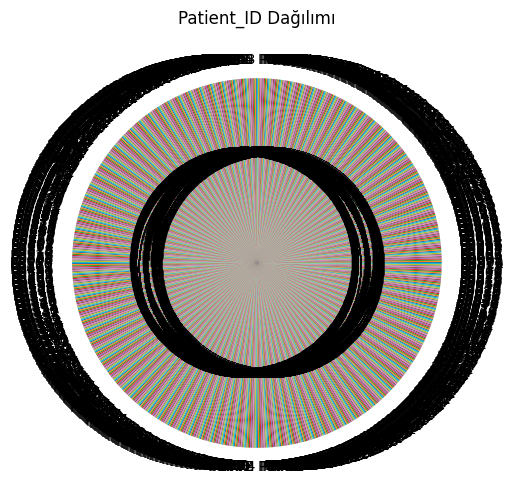

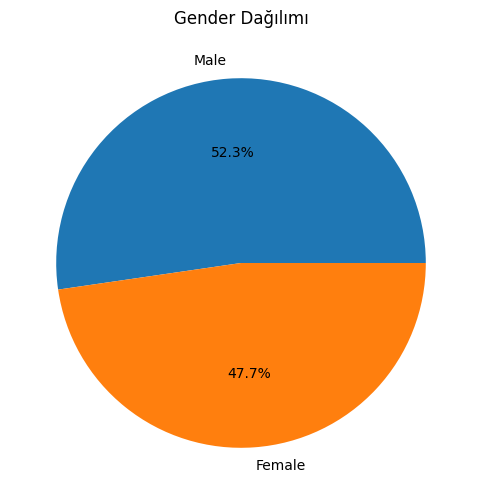

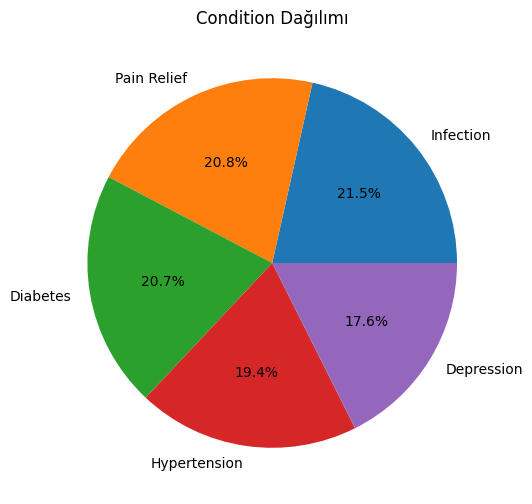

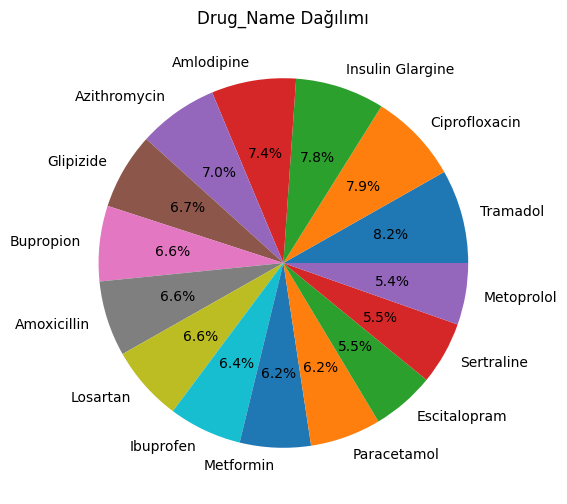

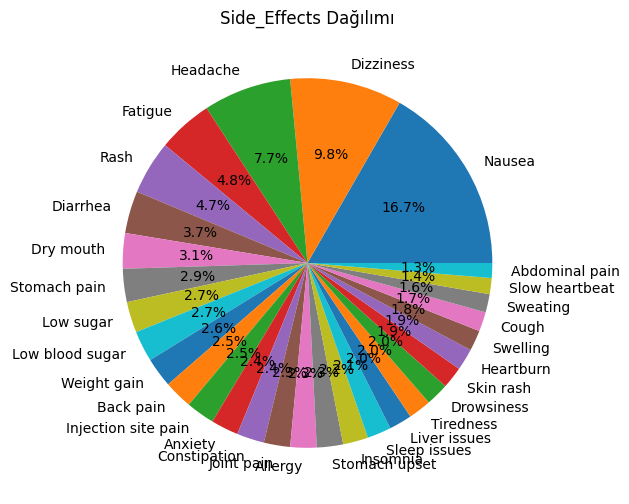

In [3]:
categorical_cols = df.select_dtypes(include=['object'])

for col in categorical_cols:
    plt.figure(figsize=(6,6))
    df[col].value_counts().plot.pie(autopct="%1.1f%%")
    plt.title(f"{col} Dağılımı")
    plt.ylabel("")
    plt.show()



**Açıklama (Soru 2 – Kategorik değişkenler için pasta grafikleri):**  
Bu hücrede hocanın **2. sorusunu** cevaplıyorum: *“Kategorik sütunlardaki verileri her sütun için ayrı ayrı olacak şekilde pie chart (pasta grafiği) ile görselleştirin.”*  

Önce `df.select_dtypes(include=['object'])` komutu ile veri setindeki **kategorik sütunları** seçiyorum ve bunları `categorical_cols` değişkeninde tutuyorum. Ardından bu sütunlar üzerinde bir `for` döngüsü kurarak her bir kategorik değişken için ayrı ayrı:
- `df[col].value_counts()` ile kategori frekanslarını hesaplıyorum,
- `plot.pie(autopct="%1.1f%%")` ile her kategori için oranları gösteren bir **pasta grafiği** çizdiriyorum,
- Grafiğin başlığını ilgili sütun adı ile (`plt.title(f"{col} Dağılımı")`) etiketliyorum,
- `plt.ylabel("")` ile gereksiz y ekseni etiketini kaldırarak görseli sadeleştiriyorum.  

Bu sayede, veri setindeki her bir kategorik değişkenin hangi sınıflardan oluştuğunu ve bu sınıfların göreli oranlarını görsel olarak değerlendirebiliyorum.

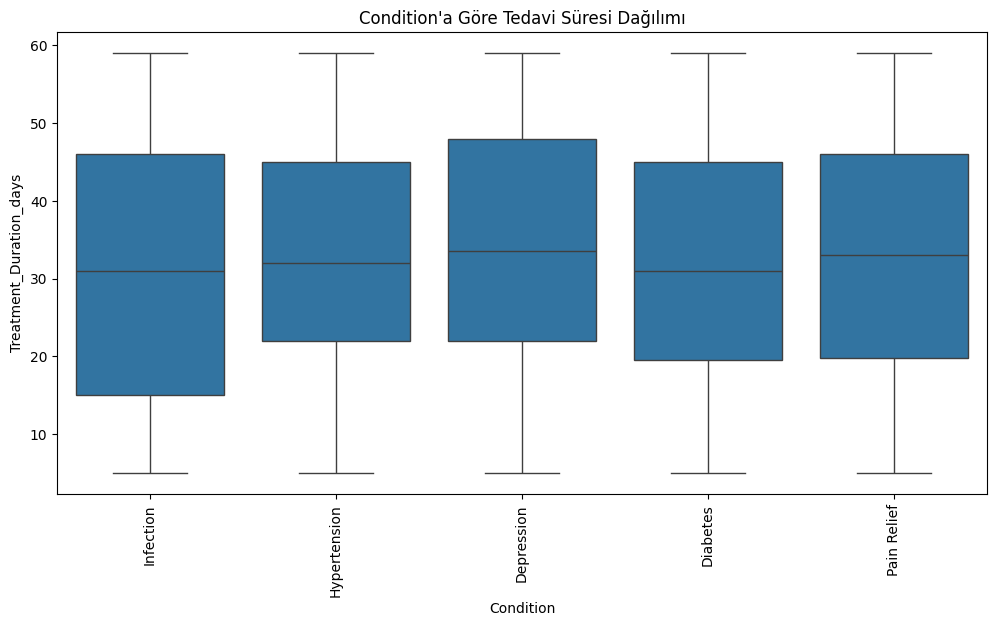

In [8]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Condition", y="Treatment_Duration_days")
plt.title("Condition'a Göre Tedavi Süresi Dağılımı")
plt.xticks(rotation=90)
plt.show()


**Açıklama (Soru 3 – Condition’a göre tedavi süresi dağılımı – Boxplot):**  
Bu hücrede hocanın **3. sorusunu** hedefliyorum: *“Condition sütunu hastalık sebebini içermektedir. Bu sebeplere karşılık gelen tedavi süresi (Treatment_Duration_days) dağılımını tek bir boxplot üzerinde görselleştirin.”*  

`plt.figure(figsize=(12,6))` ile yatayda okunabilir bir grafik boyutu belirledikten sonra, `sns.boxplot(data=df, x="Condition", y="Treatment_Duration_days")` ifadesi ile her bir **hastalık nedeni (Condition)** için **tedavi süresinin (Treatment_Duration_days)** kutu grafiğini çizdiriyorum.  

Bu tür bir **boxplot** ile:
- Her bir hastalık için tedavi süresinin medyanını,
- %25 ve %75 çeyrek değerlerini,
- Olabilecek uç değerleri (outlier gözlemler)  
tek bir figür üzerinde karşılaştırabiliyorum. Böylece bazı hastalıkların tedavi sürelerinin sistematik olarak daha uzun ya da daha kısa olup olmadığını görsel olarak inceleyebiliyorum.

In [9]:
pivot = pd.crosstab(df["Drug_Name"], df["Side_Effects"])
pivot


Side_Effects,Abdominal pain,Allergy,Anxiety,Back pain,Constipation,Cough,Diarrhea,Dizziness,Drowsiness,Dry mouth,...,Rash,Skin rash,Sleep issues,Slow heartbeat,Stomach pain,Stomach upset,Sweating,Swelling,Tiredness,Weight gain
Drug_Name,,,,,,,,,,,,,,,,,,,,,
Amlodipine,0,0,0,0,0,0,0,27,0,0,...,0,0,0,0,0,0,0,18,0,0
Amoxicillin,0,23,0,0,0,0,19,0,0,0,...,24,0,0,0,0,0,0,0,0,0
Azithromycin,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bupropion,0,0,24,0,0,0,0,0,0,18,...,0,0,0,0,0,0,0,0,0,0
Ciprofloxacin,0,0,0,0,0,0,0,28,0,0,...,0,0,0,0,0,0,0,0,0,0
Escitalopram,0,0,0,0,0,0,0,0,0,0,...,0,0,21,0,0,0,16,0,0,0
Glipizide,0,0,0,0,0,0,0,0,0,0,...,0,19,0,0,0,0,0,0,0,0
Ibuprofen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,29,0,0,0,0,0
Insulin Glargine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26


**Açıklama (Soru 4 – 2D frekans analizi için çapraz tablo hazırlığı):**  
Bu hücrede hocanın **4. sorusu** için gerekli veri yapısını oluşturuyorum: *“Drug_Name ve Side_Effects sütunları için 2 boyutlu histogram (veya uygun bir 2D frekans görselleştirmesi) çizdirin ve sonuçları yorumlayın.”*  

`pd.crosstab(df["Drug_Name"], df["Side_Effects"])` komutu ile satırlarda **ilaç isimlerinin (Drug_Name)**, sütunlarda ise **yan etkilerin (Side_Effects)** bulunduğu bir **çapraz tablo (frekans matrisi)** oluşturuyorum ve bunu `pivot` değişkenine atıyorum.  

Bu tablo, her bir ilacın hangi yan etkilerle kaç kez birlikte raporlandığını gösteren iki boyutlu bir frekans yapısıdır. Daha sonraki hücrede bu matrisi görselleştirerek ilaca–yan etkiye ilişkin örüntüleri inceleyeceğim.

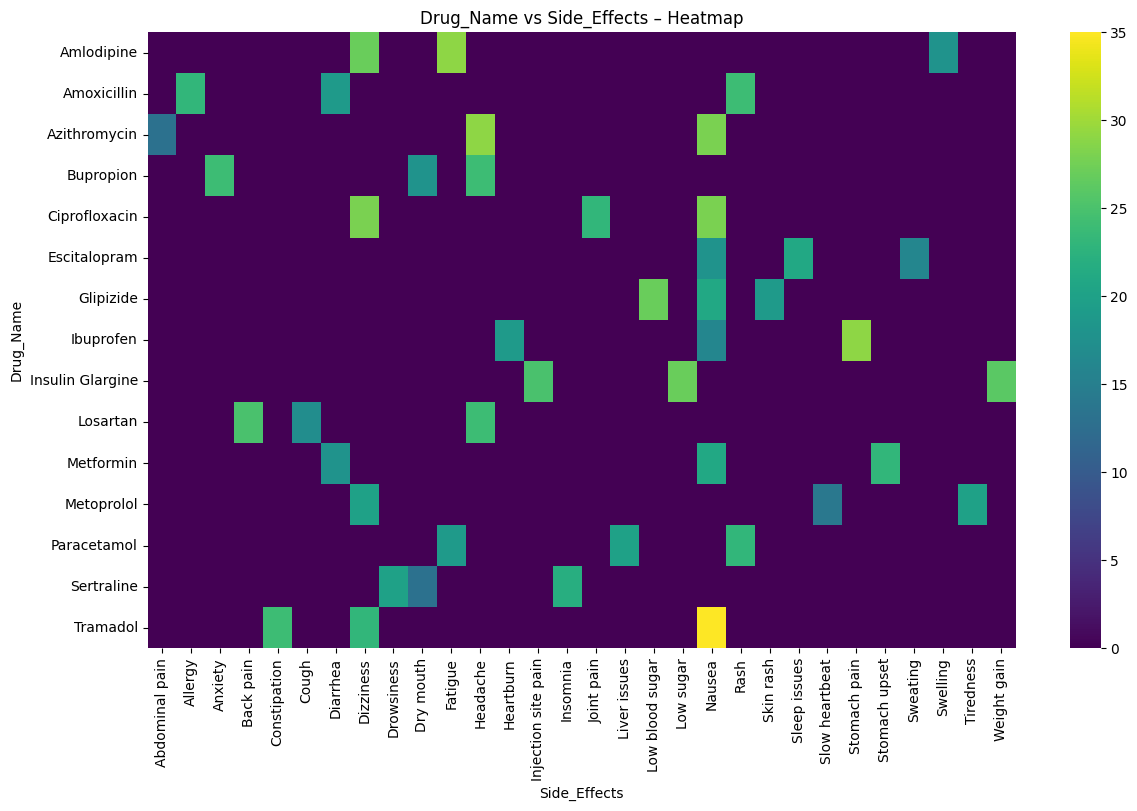

In [10]:
plt.figure(figsize=(14,8))
sns.heatmap(pivot, cmap="viridis")
plt.title("Drug_Name vs Side_Effects – Heatmap")
plt.show()


**Açıklama (Soru 4 – Drug_Name × Side_Effects için 2D frekans görselleştirmesi):**  
Bu hücrede hocanın **4. sorusunu** görselleştirme kısmıyla cevaplıyorum. Bir önceki hücrede oluşturduğum `pivot` çapraz tablosunu `sns.heatmap(pivot, cmap="viridis")` kullanarak **ısı haritası (heatmap)** biçiminde çiziyorum.  

Bu görselleştirme ile:
- Satırlarda her bir ilacı,
- Sütunlarda ise yan etkileri,
- Hücre renklerinde ise ilgili ilaç–yan etki kombinasyonunun gözlenme sıklığını  
görüyorum. Renk yoğunluğu arttıkça, o kombinasyonun veri setinde daha sık raporlandığını anlıyorum.  

Bu sayede, hangi ilaçların belirli yan etkilerle daha güçlü şekilde ilişkilendiğini, hangi yan etkilerin birçok ilaçta ortak olarak görüldüğünü ve hangi kombinasyonların nadir olduğunu iki boyutlu ve sezgisel bir şekilde analiz edebiliyorum.

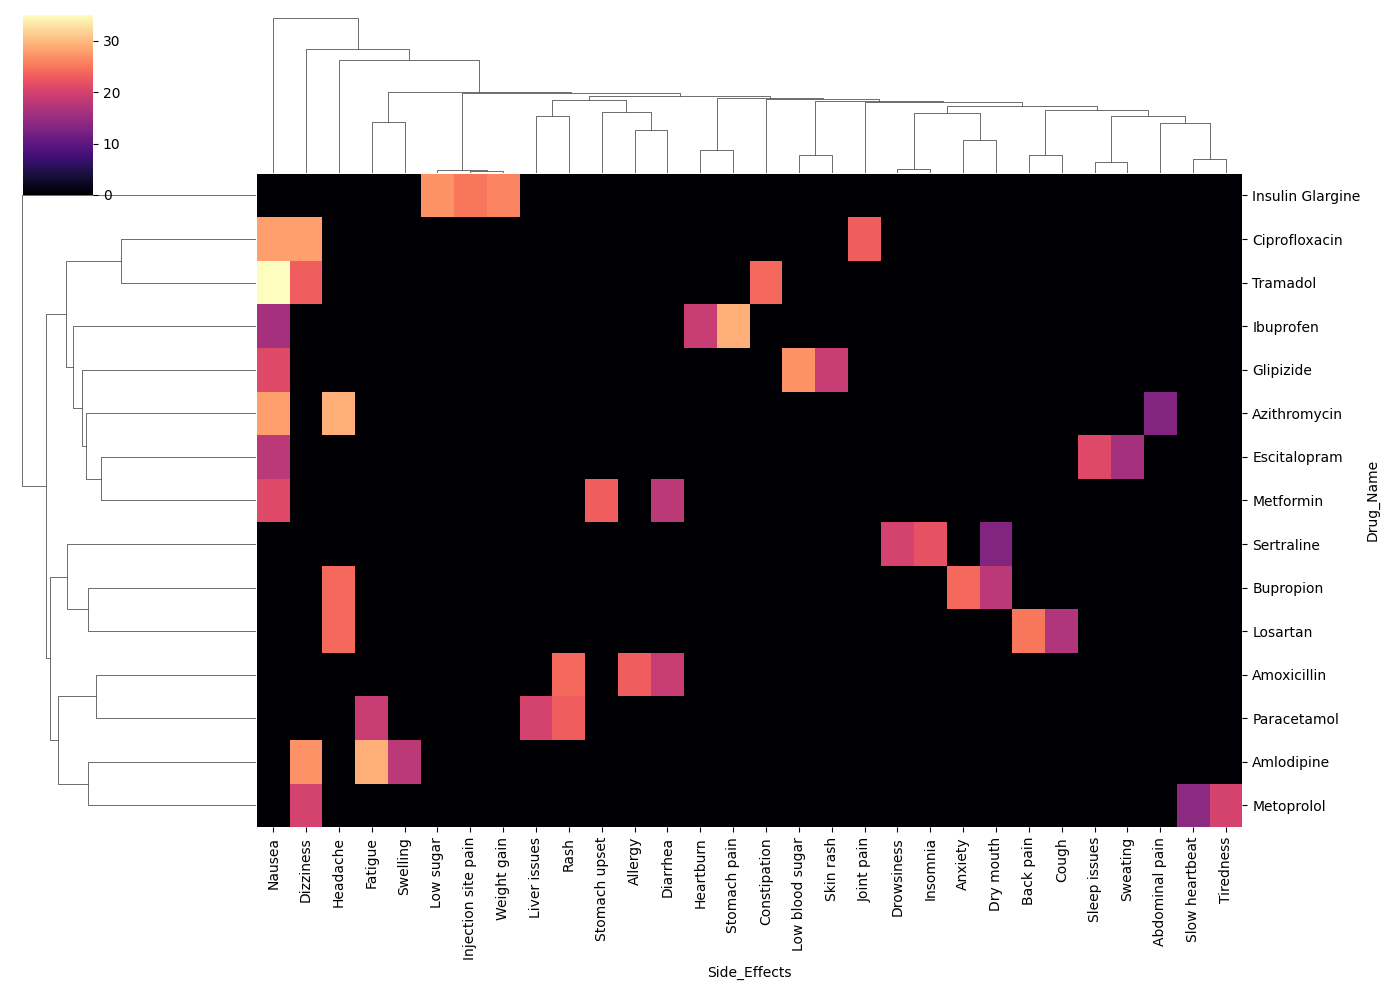

In [11]:
sns.clustermap(pivot, cmap="magma", figsize=(14,10))


**Açıklama (Soru 5 – Clustermap ile hiyerarşik kümeleme):**  
Bu hücrede hocanın **5. sorusunu** cevaplıyorum: *“Bir önceki sorudaki analizde kullandığınız veriler için, seaborn kütüphanesinden clustermap fonksiyonunu kullanarak hiyerarşik kümeleme yapın. Elde ettiğiniz grafiği yorumlayın.”*  

`sns.clustermap(pivot, cmap="magma", figsize=(14,10))` komutuyla `pivot` frekans matrisini kullanarak hem satırlarda (ilaçlar), hem de sütunlarda (yan etkiler) **hiyerarşik kümeleme** uygulayan bir küme haritası (clustermap) üretiyorum. Bu grafik:
- Benzer yan etki profiline sahip ilaçları aynı dallanma altında gruplayarak,
- Birlikte raporlanma eğilimi yüksek olan yan etkileri de birbirine yakın konumlandırarak  
iki boyutlu bir küme yapısı ortaya çıkarıyor.  

Bu çıktıyı yorumlarken, aynı dal üzerinde toplanan ilaçların yan etki paternlerinin birbirine benzediğini, buna karşın uzak dallarda yer alan ilaçların yan etki profillerinin daha farklılaştığını söyleyebilirim. Benzer şekilde, birlikte kümelenen yan etkiler de sıklıkla aynı ilaçlarla ilişkili oldukları için klinik açıdan ortak risk profilleri taşıyor olabilirler. Böylece clustermap, sadece frekansları görmekle kalmayıp veri setindeki **örüntüleri ve benzerlik yapılarını** da görsel olarak ortaya çıkarıyor.

In [12]:
corr = df["Age"].corr(df["Improvement_Score"])
corr


np.float64(0.010546289378476488)

**Açıklama (Soru 6 – Age ve Improvement_Score arasındaki korelasyon):**  
Bu hücrede hocanın **6. sorusunu** ele alıyorum: *“Yaş (Age) ve Improvement_Score değişkenleri arasındaki korelasyonu hesaplayın ve sonucu yorumlayın.”*  

`df["Age"].corr(df["Improvement_Score"])` ifadesi ile iki sayısal değişken arasındaki **Pearson korelasyon katsayısını** hesaplıyorum ve sonucu `corr` değişkeninde saklayıp ekrana yazdırıyorum.  

Bu katsayı:
- **+1**’e yaklaştıkça iki değişken arasında güçlü ve pozitif yönlü bir ilişki,
- **−1**’e yaklaştıkça güçlü ve negatif yönlü bir ilişki,
- **0**’a yaklaştıkça da ilişkisiz ya da çok zayıf bir ilişki olduğunu gösterir.  

Buradaki çıktı değerine bakarak, yaş arttıkça tedavi iyileşme skorunun artma (veya azalma) eğilimi gösterip göstermediğini, ilişkinin yönünü ve gücünü yorumlayabiliyorum. Böylece yaş değişkeninin tedavi başarısı üzerinde anlamlı bir desen sergileyip sergilemediğini istatistiksel olarak değerlendirmiş oluyorum.

In [13]:
count_table = df.groupby(["Gender", "Condition"]).size()
normalized = count_table.groupby(level=0).apply(lambda x: x / x.sum())
normalized


Gender  Gender  Condition   
Female  Female  Depression      0.176101
                Diabetes        0.213836
                Hypertension    0.178197
                Infection       0.238994
                Pain Relief     0.192872
Male    Male    Depression      0.175908
                Diabetes        0.200765
                Hypertension    0.208413
                Infection       0.193117
                Pain Relief     0.221797
dtype: float64

**Açıklama (Soru 7 – Cinsiyete göre normalize edilmiş Condition dağılımları):**  
Bu hücrede hocanın **7. sorusunu** cevaplıyorum: *“Erkekler ve kadınlar için hastalık (Condition) oranlarını normalize edilmiş bir şekilde hesaplayın.”*  

Önce `df.groupby(["Gender", "Condition"]).size()` ile her bir **cinsiyet–hastalık** kombinasyonu için gözlem sayısını hesaplıyor ve sonucu `count_table` değişkeninde saklıyorum. Bu yapı, ham frekansları içeriyor.  

Daha sonra `count_table.groupby(level=0).apply(lambda x: x / x.sum())` adımıyla her bir **Gender** grubunun kendi içindeki toplamını 1’e eşitleyecek şekilde normalize ediyorum. Böylece:
- Her bir cinsiyet için tüm hastalık olasılıklarının toplamı 1 olacak şekilde,
- Satır değerlerini **olasılık dağılımı** gibi okuyabileceğim  
normalize edilmiş bir tablo elde ediyorum.  

Bu tabloyu inceleyerek kadın ve erkek hastalar için hangi hastalıkların daha yüksek oranda görüldüğünü, cinsiyetler arasında hastalık dağılımının nasıl farklılaştığını karşılaştırmalı olarak değerlendirebiliyorum.

In [14]:
dizzy_drugs = df[df["Side_Effects"] == "Dizziness"]["Drug_Name"].value_counts()
dizzy_drugs


Drug_Name
Ciprofloxacin    28
Amlodipine       27
Tramadol         23
Metoprolol       20
Name: count, dtype: int64

**Açıklama (Soru 8 – Baş dönmesi (Dizziness) yan etkisi görülen ilaçlar):**  
Bu hücrede hocanın **8. sorusunu** karşılıyorum: *“Hangi ilaçlar için baş dönmesi (Dizziness) yan etkisi raporlanmıştır? Bu ilaçları azalan sıklığa göre sıralayın.”*  

`df[df["Side_Effects"] == "Dizziness"]` ifadesi ile yan etkisi **“Dizziness”** olarak raporlanan tüm kayıtları filtreliyorum. Ardından bu alt kümede `"Drug_Name"` sütununa `value_counts()` uygulayarak:
- Hangi ilacın,
- Kaç kez Dizziness yan etkisi ile birlikte raporlandığını  
hesaplıyor ve sonucu `dizzy_drugs` değişkeninde saklıyorum.  

`value_counts()` sonucu varsayılan olarak **azalan sırada** döndüğü için, çıktıyı direkt inceleyerek en sık baş dönmesi yan etkisi ile ilişkilendirilen ilaçları en üstte, daha az sıklıkta raporlananları ise alttaki satırlarda görebiliyorum.

In [15]:
meta = df[df["Drug_Name"] == "Metoprolol"]
ratio = (meta["Side_Effects"] == "Dizziness").mean()
ratio


np.float64(0.37037037037037035)

**Açıklama (Soru 9 – Metoprolol için Dizziness olasılığı):**  
Bu hücrede hocanın **9. sorusunu** cevaplıyorum: *“Metoprolol ilacı için, diğer yan etkilere göre baş dönmesi (Dizziness) yan etkisinin olasılığını hesaplayın.”*  

Önce `df[df["Drug_Name"] == "Metoprolol"]` filtresiyle yalnızca **Metoprolol** ilacına ait gözlemleri seçiyor ve bunları `meta` isimli DataFrame’te topluyorum. Daha sonra `(meta["Side_Effects"] == "Dizziness").mean()` ifadesi ile bu alt kümede yan etkinin **“Dizziness”** olduğu gözlemlerin oranını hesaplıyorum ve sonucu `ratio` değişkenine atıyorum.  

Boolean bir seri üzerinde `mean()` almak, `True` değerlerin oranını verdiği için, burada elde edilen değer Metoprolol için raporlanan tüm yan etkiler arasında **baş dönmesi görülme olasılığını** temsil ediyor. Bu oran yüksekse, Metoprolol kullanımında baş dönmesi yan etkisinin görece daha önemli bir risk faktörü olduğu söylenebilir; düşükse, Dizziness bu ilaç için daha nadir görülen bir yan etki olarak yorumlanabilir.